In [1]:
from imports import *
from classes import NeuralNetwork, GradientDescent
from functions import *
import classes
import functions
import imports
import importlib

importlib.reload(classes) 
importlib.reload(functions)
importlib.reload(imports)

<module 'imports' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\FYS-STK4155_coursework\\Project-2\\Code\\imports.py'>

Layers: 1 and nodes: 1 with time: 6.76 s, and MSE: 1.14e-01
Layers: 1 and nodes: 5 with time: 6.50 s, and MSE: 4.17e-02
Layers: 1 and nodes: 10 with time: 6.58 s, and MSE: 4.30e-02
Layers: 1 and nodes: 50 with time: 7.82 s, and MSE: 3.95e-02
Layers: 1 and nodes: 100 with time: 8.86 s, and MSE: 3.92e-02
Layers: 2 and nodes: 1 with time: 9.70 s, and MSE: 9.75e-02
Layers: 2 and nodes: 5 with time: 9.62 s, and MSE: 3.96e-02
Layers: 2 and nodes: 10 with time: 10.02 s, and MSE: 3.98e-02
Layers: 2 and nodes: 50 with time: 19.17 s, and MSE: 4.05e-02
Layers: 2 and nodes: 100 with time: 44.87 s, and MSE: 3.89e-02
Layers: 3 and nodes: 1 with time: 12.15 s, and MSE: 1.14e-01
Layers: 3 and nodes: 5 with time: 12.24 s, and MSE: 3.91e-02
Layers: 3 and nodes: 10 with time: 12.94 s, and MSE: 4.07e-02
Layers: 3 and nodes: 50 with time: 32.99 s, and MSE: 3.87e-02
Layers: 3 and nodes: 100 with time: 79.22 s, and MSE: 3.99e-02
Layers: 4 and nodes: 1 with time: 15.76 s, and MSE: 1.14e-01
Layers: 4 and nodes

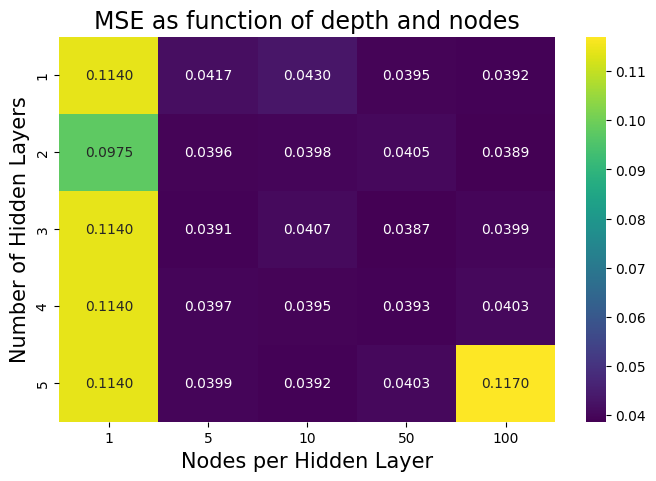

In [13]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(n=1000, noise_std=0.2)

activation_funcs = [sigmoid, reLU, leaky_reLU]
activation_ders  = [sigmoid_der, reLU, leaky_reLU]
nodes_list = [1,5,10,50,100]
hidden_layers = [1,2,3,4,5]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))
timeMatrix = np.empty(mseMatrix.shape)

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):

        start = time.perf_counter()

        LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [reLU]*(hidden_layer) + [identity], [ReLU_der]*(hidden_layer)+[identity_der], mse, mse_der)
        LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
        y_pred = LinReg.feed_forward(X_train)
        mseMatrix[h, n] = format(mse(y_pred, y_train), ".2e")

        end = time.perf_counter()
        time_iter = end - start
        timeMatrix[h,n] = time_iter

        print(f"Layers: {hidden_layer} and nodes: {nodes} with time: {time_iter:.2f} s, and MSE: {format(mseMatrix[h,n], ".2e")}")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(mseMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_d_MSETrain_reLU.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
